Visualization of data gathered by the following query:
```
select x.year, x.brand_name, x.generic_name, x.sum_total_day_supply, x.sum_total_drug_cost, (x.sum_total_drug_cost / x.sum_total_day_supply) as avg_drug_cost
from (select  year, brand_name, generic_name, SUM(total_day_supply) as sum_total_day_supply, SUM(total_drug_cost) as sum_total_drug_cost
from filtered_medicare_data_set as md where generic_name in ('Adalimumab', 'Atorvastatin Calcium', 'Donepezil Hcl',
                  'Etanercept', 'Sertraline Hcl', 'Vortioxetine Hydrobromide', 'Zolpidem Tartrate')
group by year, brand_name, generic_name) as x
order by generic_name, avg_drug_cost desc;
```

While looking at the data for average cost throughout the years, I noticed some patterns with some of the drugs, I took a closer look, here are the results:

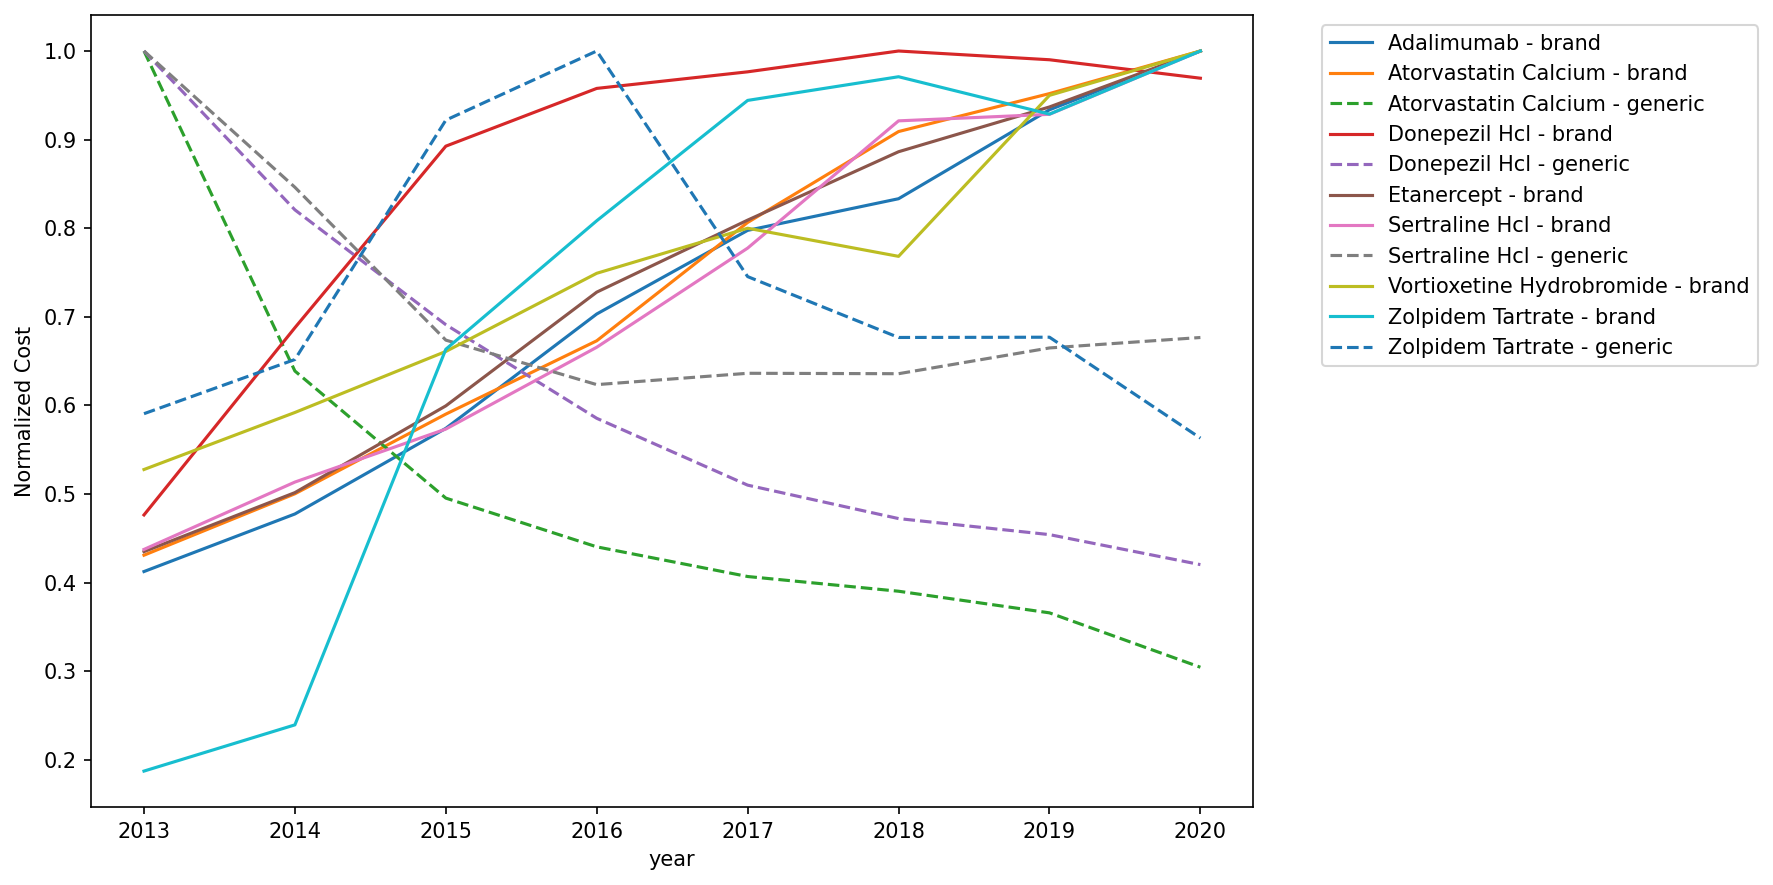

In [10]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

YEARS = list(range(2013, 2021))

data = {

}
plt.figure(figsize=(12, 6), dpi=150)
with open('./drug_costs_per_year.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        genName = row['generic_name']
        brand = row['brand_name']
        year = int(row['year'])
        avgValue = float(row['avg_drug_cost'])
        isGeneric = genName in brand
        key = f'{genName} - {"generic" if isGeneric else "brand"}'
        if key not in data:
            data[key] = pd.DataFrame({
                'year':[],
                'avg drug cost':[]
            })
        
        data[key] = pd.concat([data[key], pd.DataFrame({'year':[year], 'avg drug cost': [avgValue]})], axis=0, ignore_index=True)
    
    for key, df in data.items():
        df.drop_duplicates(subset=['year'], keep='last', inplace=True, ignore_index=True)
        df.set_index('year', inplace=True)
        df.sort_values('year', inplace=True)
        df['avg drug cost'] = df['avg drug cost'] / df['avg drug cost'].abs().max()
        df['avg drug cost'].plot(label=key, linestyle='solid' if 'brand' in key else 'dashed')

    plt.ylabel('Normalized Cost')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()

        


Without normalization:

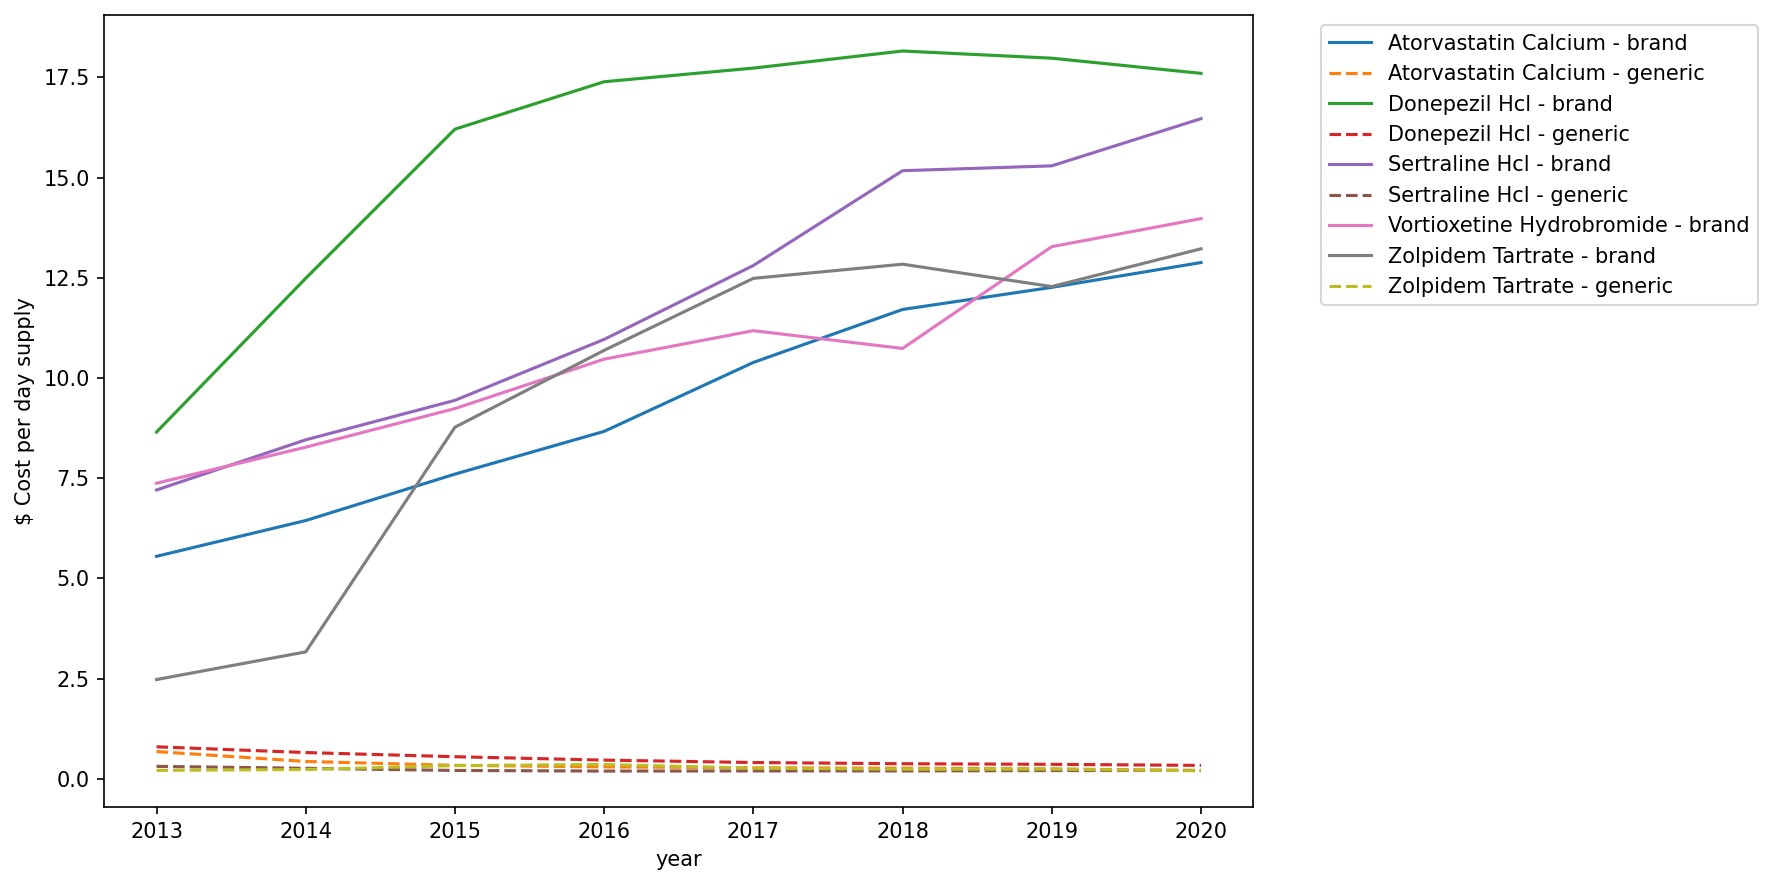

In [15]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

YEARS = list(range(2013, 2021))

data = {

}
plt.figure(figsize=(12, 6), dpi=150)
with open('./drug_costs_per_year.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        genName = row['generic_name']
        brand = row['brand_name']
        year = int(row['year'])
        avgValue = float(row['avg_drug_cost'])
        isGeneric = genName in brand
        if genName in ['Adalimumab', 'Etanercept']: # ignore high cost drugs that don't have generic variants to focus on smaller set
            continue
        key = f'{genName} - {"generic" if isGeneric else "brand"}'
        if key not in data:
            data[key] = pd.DataFrame({
                'year':[],
                'avg drug cost':[]
            })
        
        data[key] = pd.concat([data[key], pd.DataFrame({'year':[year], 'avg drug cost': [avgValue]})], axis=0, ignore_index=True)
    
    for key, df in data.items():
        df.drop_duplicates(subset=['year'], keep='last', inplace=True, ignore_index=True)
        df.set_index('year', inplace=True)
        df.sort_values('year', inplace=True)
        # df['avg drug cost'] = df['avg drug cost'] / df['avg drug cost'].abs().max()
        df['avg drug cost'].plot(label=key, linestyle='solid' if 'brand' in key else 'dashed')

    plt.ylabel('$ Cost per day supply')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()